## Organized Plant Disease Dataset by Category and Disease Type

In [18]:
import os
import shutil
from pathlib import Path
from natsort import natsorted

# Define the root directory of the current dataset
root_dir = "/kaggle/input/project/project"

# Define the new output directory
output_dir = "/kaggle/working/organized_dataset"

# Define categories and their corresponding diseases (with spaces)
categories = {
    "Fresh_leaf": ["Fresh leaf", "Eggplant fresh leaf", "Tomato Fresh leaf"],
    "Bacterial": ["Tomato Bacterial spot", "Black Rot"],
    "Viral": ["Mosaic virus", "Tomato leaf curl virus", "Eggplant begomovirus", "Tomato spotted wilt"],
    "Fungal": ["Downey mildew", "Downy mildew", "Fusarium wilt", "Anthracnose", 
               "Eggplant Cercopora leaf spot", "Eggplant verticillium wilt", "Anthracnose lesions"]
}

# If the folder already exists, remove it and create a new one
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

# Create new category folders
for category in categories:
    Path(os.path.join(output_dir, category)).mkdir(parents=True, exist_ok=True)

# Initialize a dictionary to count images per category
image_counts = {category: 0 for category in categories}
image_counters = {category: {} for category in categories}

# Function to get category for a given folder
def get_category(folder_name):
    for category, folders in categories.items():
        if folder_name in folders:
            return category
    raise ValueError(f"Folder {folder_name} not found in any category!")

# Walk through the current dataset
for crop_folder in os.listdir(root_dir):
    crop_path = os.path.join(root_dir, crop_folder)
    if not os.path.isdir(crop_path):
        continue
    
    for disease_folder in os.listdir(crop_path):
        disease_path = os.path.join(crop_path, disease_folder)
        if not os.path.isdir(disease_path):
            continue
        
        # Determine the category for the disease
        try:
            category = get_category(disease_folder)
        except ValueError as e:
            print(e)
            continue
        
        # Initialize counter if not already done
        if disease_folder not in image_counters[category]:
            image_counters[category][disease_folder] = 1
        
        # Process each image in the disease folder (Natural Sort to maintain order)
        image_files = natsorted(os.listdir(disease_path))
        
        for image_name in image_files:
            image_path = os.path.join(disease_path, image_name)
            if not os.path.isfile(image_path):
                continue
            
            # New image name format: Crop_Disease_imgX.jpg
            new_image_name = f"{crop_folder.replace(' ', '_')}_{disease_folder.replace(' ', '_')}_img{image_counters[category][disease_folder]}.jpg"
            destination_path = os.path.join(output_dir, category, new_image_name)
            
            # Copy the image to the new location with the new name
            shutil.copy2(image_path, destination_path)
            image_counters[category][disease_folder] += 1
            image_counts[category] += 1

print("\n Dataset organization complete!")



✅ Dataset organization complete!


In [42]:
import os
from natsort import natsorted

# Folder path for Bacterial
folder_path = "/kaggle/working/organized_dataset/Bacterial"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Bacterial")
for image_name in image_names[:5]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fresh_leaf"

image_names = natsorted(os.listdir(folder_path))
print("last_5_items Fresh leaf") 
for image_name in image_names[-5:]:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Fungal"

image_names = natsorted(os.listdir(folder_path))
print("Middle_5_items of Fungal")
middle_5_items = image_names[len(image_names)//2 - 2 : len(image_names)//2 + 3]
for image_name in middle_5_items:
    print(image_name)

folder_path = "/kaggle/working/organized_dataset/Viral"

image_names = natsorted(os.listdir(folder_path))
print("First_5_items of Viral")
for image_name in image_names[:5]:
    print(image_name)

First_5_items of Bacterial
Cauliflower_Black_Rot_img1.jpg
Cauliflower_Black_Rot_img2.jpg
Cauliflower_Black_Rot_img3.jpg
Cauliflower_Black_Rot_img4.jpg
Cauliflower_Black_Rot_img5.jpg
last_5_items Fresh leaf
Tomato_Tomato_Fresh_leaf_img590.jpg
Tomato_Tomato_Fresh_leaf_img591.jpg
Tomato_Tomato_Fresh_leaf_img592.jpg
Tomato_Tomato_Fresh_leaf_img593.jpg
Tomato_Tomato_Fresh_leaf_img594.jpg
Middle_5_items of Fungal
Cauliflower_Downy_mildew_img352.jpg
Cauliflower_Downy_mildew_img353.jpg
Cauliflower_Downy_mildew_img354.jpg
Cauliflower_Downy_mildew_img355.jpg
Cauliflower_Downy_mildew_img356.jpg
First_5_items of Viral
Bitter_Gourd_Mosaic_virus_img1.jpg
Bitter_Gourd_Mosaic_virus_img2.jpg
Bitter_Gourd_Mosaic_virus_img3.jpg
Bitter_Gourd_Mosaic_virus_img4.jpg
Bitter_Gourd_Mosaic_virus_img5.jpg


## Total Images and Folder-wise Distribution Overview

In [25]:
# Calculate total images
total_images = sum(image_counts.values())

# Print image counts per category
print("Image counts per category:")
for category, count in image_counts.items():
    print(f"{category}: {count} images")
print(f"\nTotal images across all categories: {total_images} images")

Image counts per category:
Fresh_leaf: 3487 images
Bacterial: 1149 images
Viral: 2729 images
Fungal: 5421 images

Total images across all categories: 12786 images


## Bar Chart Representation of Folder-wise Image Counts
Display each category with the number of images for easy comparison.


Bar chart saved as 'image_count_plot.png'


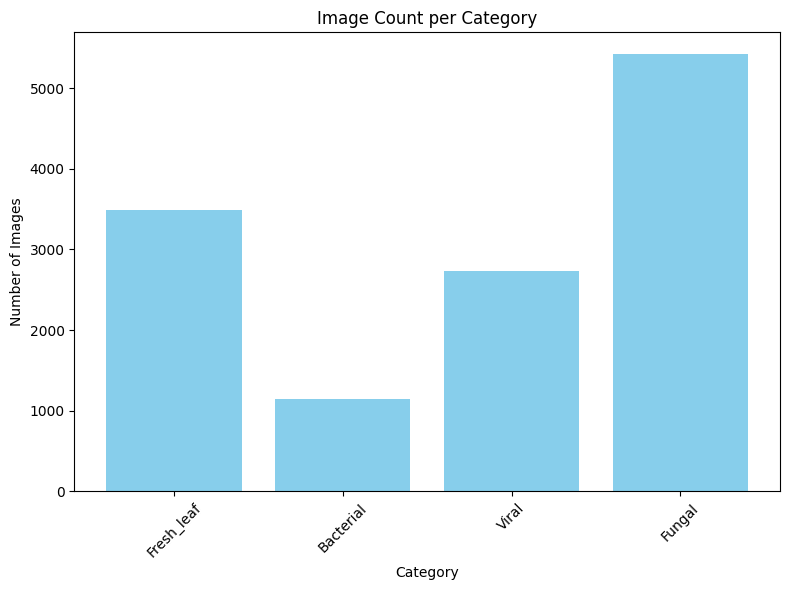

In [30]:
import matplotlib.pyplot as plt

# Create a bar chart for image counts
plt.figure(figsize=(8, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.title("Image Count per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("image_count_plot.png")
print("\nBar chart saved as 'image_count_plot.png'")